In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

import acquire

# Getting to know my data:

In [6]:
#used the excel version as it was easier to acquire from my computer
df= acquire.excel_file()
#looking at columns as there seems to be alot
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_auto',
       'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_internet', 'partner_dependants', 'calculated_monthly_avg',
       'validate', 'phone_service_type', 'internet_service_type',
       'contract_type.1', 'rounded_tenure', 'service_type', 'tenure_bins'],
      dtype='object')

In [15]:
#checking out dytpes
df.dtypes

customer_id                object
gender                     object
is_senior_citizen         float64
partner                    object
dependents                 object
phone_service             float64
internet_service          float64
contract_type             float64
payment_type               object
monthly_charges           float64
total_charges             float64
churn                      object
tenure                    float64
is_auto                     int64
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_internet           bool
partner_dependants          int64
calculated_monthly_avg     object
validate                   object
phone_service_type         object
internet_service_type      object
contract_type.1            object
rounded_tenure              int64
service_type               object
tenure_bins                object
dtype: object

In [21]:
#it looks like I will want to fillna by mean for the total_charges:
df.isnull().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_auto                    0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_internet         0
partner_dependants         0
calculated_monthly_avg     0
validate                   0
phone_service_type         0
internet_service_type      0
contract_type.1            0
rounded_tenure             0
service_type               0
tenure_bins                0
dtype: int64

In [25]:
#for senior citizen demographics: 
df.is_senior_citizen.value_counts()

#Takeaways: not many senior citizens

0.0    5907
1.0    1142
Name: is_senior_citizen, dtype: int64

In [26]:
#for clients with partner and/or dependants demographics: 
#note: 0= single |  3= has partner AND dependants | 2= has dependants  | 1= has partner
df.partner_dependants.value_counts()

#Takeaways:more singles

0    3281
3    1754
1    1653
2     361
Name: partner_dependants, dtype: int64

In [27]:
#for gender demographics:
df.gender.value_counts()

#Takeaways:mostly even between gender

Male      3558
Female    3491
Name: gender, dtype: int64

# NOTES for QUESTIONS:
- What are the drivers for churn?
    - Explore: monthly charges | partner & dependents (partner_dependants) | senior citizen | has phone_internet

ValueError: could not convert string to float: 'calculated_monthly_avg'

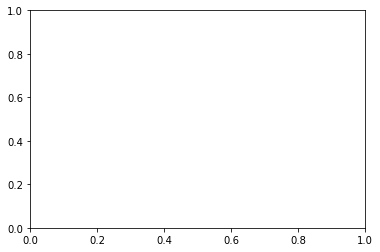